# 9. Oja’s hebbian learning rule

In [2]:
import neurodynex3.ojas_rule.oja as oja

Imagine a neuron receiving signals from the retina:

If the inputs are light intensities from different parts of the visual field, and there is a consistent edge in the image, the variance will be highest along the direction where light intensity changes from dark to light.
Oja’s Rule will adjust the weights toward detecting that edge direction because it carries meaningful visual information.

In a biological neuron, learning occurs through synaptic plasticity, where the strength of connections between neurons (synapses) changes based on activity. Oja’s learning rule is a mathematical model that describes how synapses might adjust in a way that is both biologically plausible and computationally useful.

First, the presynaptic neuorns fire action potentials and produce a postsynaptic potential. The postsynaptic neuron then integrates the incoming signals; if the combined input is strong enough it will fire. In a real neuron, this process occurs via synaptic summation, where multiple inputs add together to determine whether the neuron fires.

y = w1v1 + w2v1

When the presynaptic and postsynaptic neurons are active at the same time, the synapse is strengthened (neurons that fire together, wire together). In a real neuron, this could correspond to:

Long-Term Potentiation (LTP):

If a presynaptic neuron frequently fires just before the postsynaptic neuron, the connection strengthens. This occurs due to molecular changes, such as increased neurotransmitter release and receptor sensitivity.

Long-Term Depression (LTD):

If a presynaptic neuron fires without the postsynaptic neuron being active, the connection weakens. This ensures that only useful synapses remain strong.



# 9.1. Exercise: getting started


In [3]:
cloud = oja.make_cloud()  # generate data points
wcourse = oja.learn(cloud)  # learn weights and return timecourse

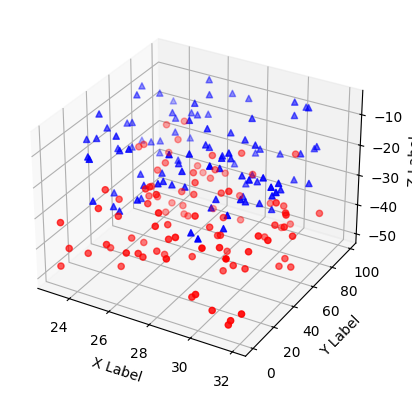

In [4]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

def plot_oja_trace(data_cloud, weights_course):
    """
    Plots the datapoints and the time series of the weights
    Args:
        data_cloud (numpy.ndarray): n by 2 data
        weights_course (numpy.ndarray): n by 2 weights

    Returns:

    """
    plt.scatter(
        data_cloud[:, 0],
        data_cloud[:, 1],
        marker=".",
        facecolor="none",
        edgecolor="#222222",
        alpha=.2
    )
    plt.xlabel("x1")
    plt.ylabel("x2")

    # color time and plot with colorbar
    time = np.arange(len(weights_course))
    colors = plt.cm.cool(time / float(len(time)))
    sm = plt.cm.ScalarMappable(
        cmap=plt.cm.cool,
        norm=plt.Normalize(vmin=0, vmax=len(data_cloud))
    )
    sm.set_array(time)
    cb = plt.colorbar(sm)
    cb.set_label("Iteration")
    plt.scatter(
        weights_course[:, 0],
        weights_course[:, 1],
        facecolor=colors,
        edgecolor="none",
        lw=2
    )

    # ensure rectangular plot
    x_min = data_cloud[:, 0].min()
    x_max = data_cloud[:, 0].max()
    y_min = data_cloud[:, 1].min()
    y_max = data_cloud[:, 1].max()
    lims = [min(x_min, y_min), max(x_max, y_max)]
    plt.xlim(lims)
    plt.ylim(lims)
    plt.show()


def randrange(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100

# for each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

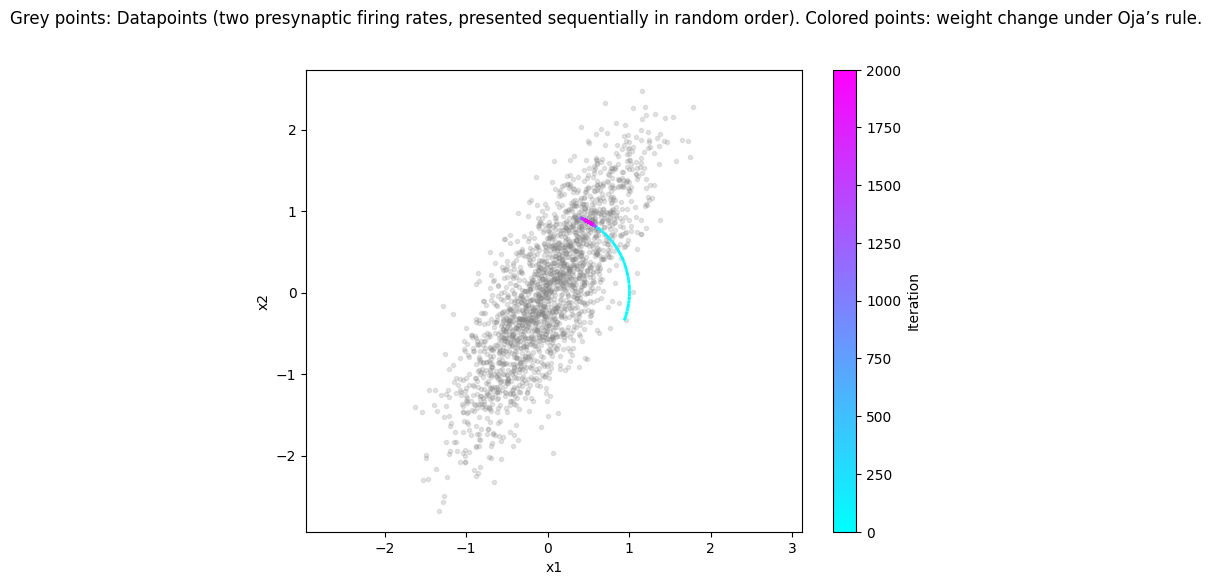

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.collections as mcoll
import neurodynex3.ojas_rule.oja as oja

cloud = oja.make_cloud(n=2000, ratio=.3, angle=60)
wcourse = oja.learn(cloud, initial_angle=-20, eta=0.04)

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(cloud[:, 0], cloud[:, 1], marker=".", alpha=0.2, color="gray")

# color mapping
iterations = np.arange(len(wcourse))
norm = colors.Normalize(vmin=0, vmax=len(wcourse))
cmap = cm.cool

# line segments
points = np.array([wcourse[:, 0], wcourse[:, 1]]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# linecollection
lc = mcoll.LineCollection(segments, cmap=cmap, norm=norm, linewidth=2)
lc.set_array(iterations)  
ax.add_collection(lc)

cbar = plt.colorbar(lc, ax=ax)
cbar.set_label("Iteration")

ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.axis("equal")
plt.suptitle("Grey points: Datapoints (two presynaptic firing rates, presented sequentially in random order). Colored points: weight change under Oja’s rule.")
plt.show()


The final weight vector w is: (0.4869771975599494,0.8748435916106823)


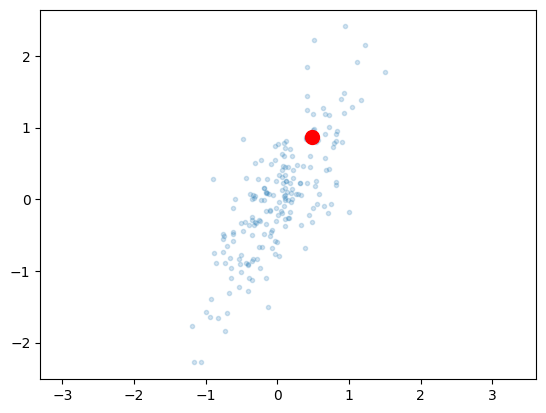

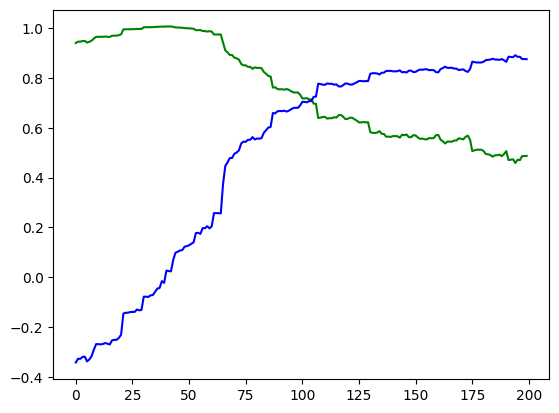

In [6]:
%matplotlib inline 
import neurodynex3.ojas_rule.oja as oja
import matplotlib.pyplot as plt

cloud = oja.make_cloud(n=200, ratio=.3, angle=60)
wcourse = oja.learn(cloud, initial_angle=-20, eta=0.04)
plt.scatter(cloud[:, 0], cloud[:, 1], marker=".", alpha=.2)
plt.plot(wcourse[-1, 0], wcourse[-1, 1], "or", markersize=10)
plt.axis('equal')
plt.figure()
plt.plot(wcourse[:, 0], "g")
plt.plot(wcourse[:, 1], "b")
print("The final weight vector w is: ({},{})".format(wcourse[-1,0],wcourse[-1,1]))

**9.1.1: The norm of weights**

The figure below shows the configuration of a neuron learning from the joint input of two presynaptic neurons.

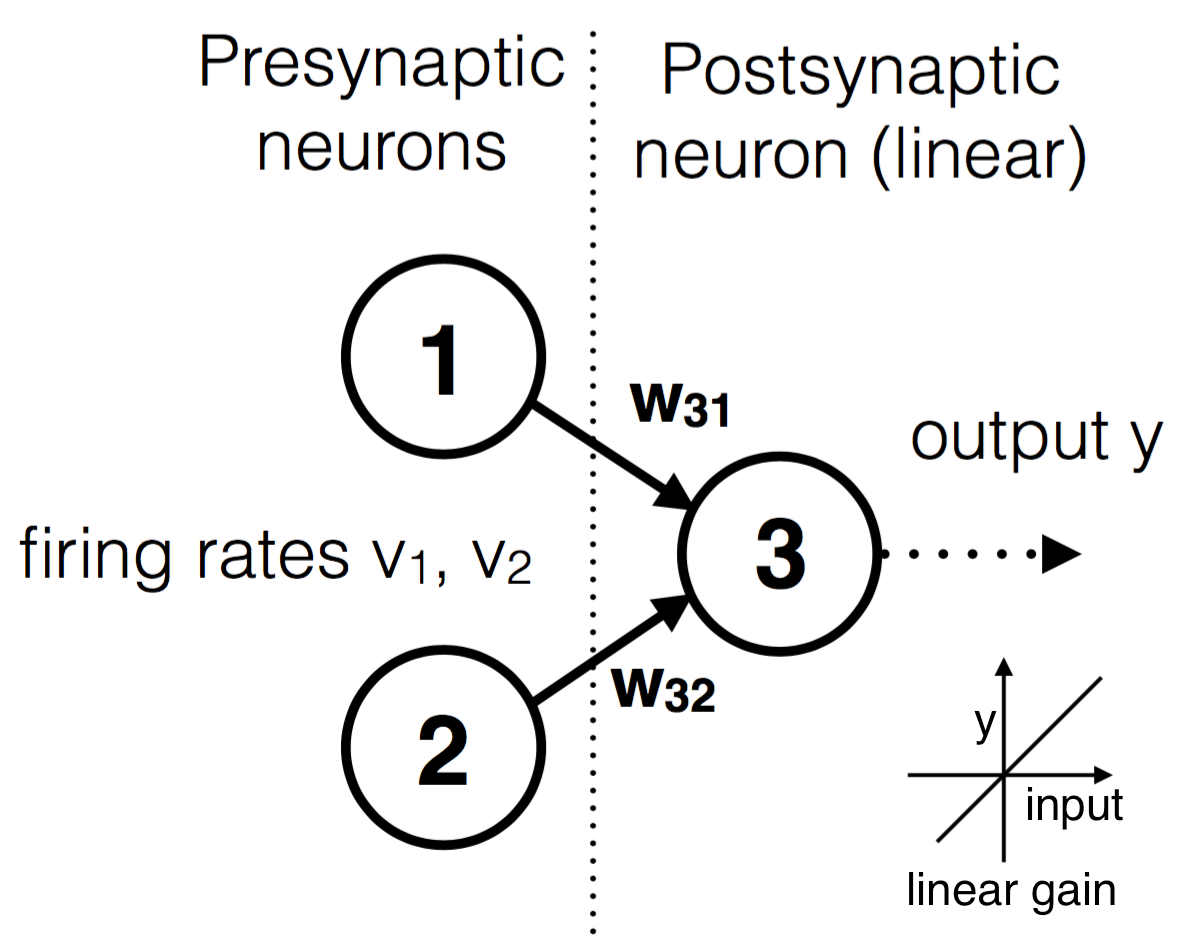

*Run the script with a large learning rate eta = 0.2. What do you observe?*

normal eta

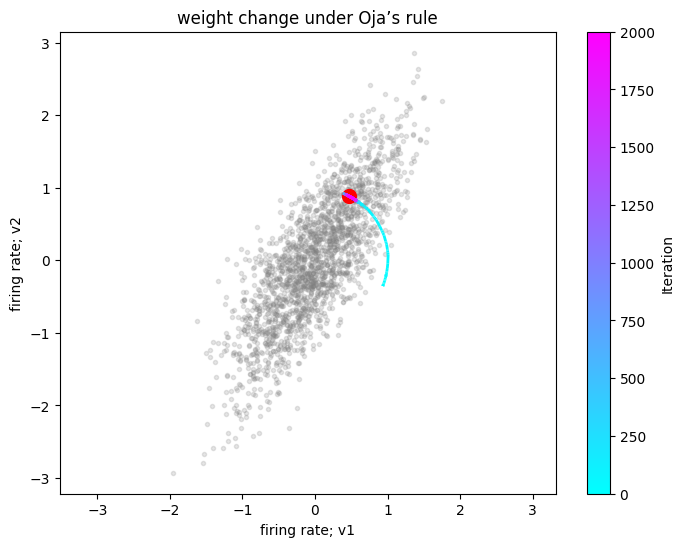

The final weight vector w is: (0.475637879191342,0.8805174559457374)


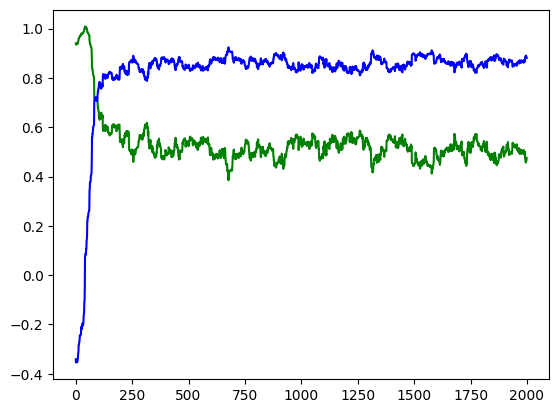

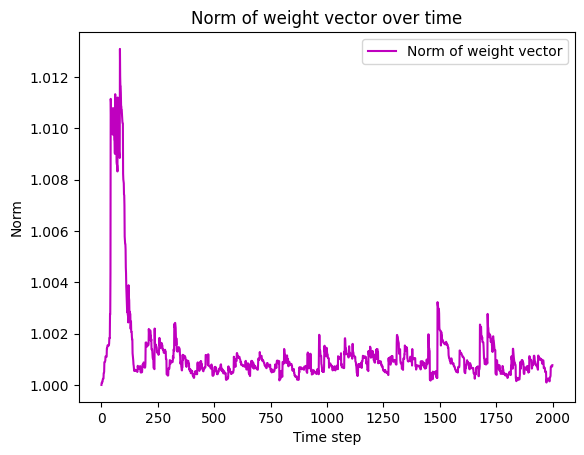

In [7]:
# eta 0.04


import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.collections as mcoll
import neurodynex3.ojas_rule.oja as oja

cloud = oja.make_cloud(n=2000, ratio=.3, angle=60)
wcourse = oja.learn(cloud, initial_angle=-20, eta=0.04)

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(cloud[:, 0], cloud[:, 1], marker=".", alpha=0.2, color="gray")
plt.plot(wcourse[-1, 0], wcourse[-1, 1], "or", markersize=10) # mark final weight vector

# color mapping
iterations = np.arange(len(wcourse))
norm = colors.Normalize(vmin=0, vmax=len(wcourse))
cmap = cm.cool

# line segments
points = np.array([wcourse[:, 0], wcourse[:, 1]]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# linecollection
lc = mcoll.LineCollection(segments, cmap=cmap, norm=norm, linewidth=2)
lc.set_array(iterations)  
ax.add_collection(lc)

cbar = plt.colorbar(lc, ax=ax)
cbar.set_label("Iteration")

ax.set_xlabel("firing rate; v1")
ax.set_ylabel("firing rate; v2")
ax.axis("equal")
plt.title("weight change under Oja’s rule")
#plt.suptitle("Grey points: Datapoints (two presynaptic firing rates, presented sequentially in random order). Colored points: weight change under Oja’s rule.")
plt.show()

plt.figure()
plt.plot(wcourse[:, 0], "g")
plt.plot(wcourse[:, 1], "b")

print("The final weight vector w is: ({},{})".format(wcourse[-1,0],wcourse[-1,1]))

weight_norm = np.linalg.norm(wcourse, axis=1)

plt.figure()
plt.plot(weight_norm, "m", label="Norm of weight vector")
plt.xlabel("Time step")
plt.ylabel("Norm")
plt.title("Norm of weight vector over time")
plt.legend()


The gray points represent the dataset, where each point corresponds to a pair of firing rates from two presynaptic neurons. These firing rates are presented sequentially in a random order, acting as the inputs to the postsynaptic neuron.

The colored trajectory shows the evolution of the synaptic weight vector over time. Learning begins at some initial point, and as iterations progress, the weights change according to Oja’s rule, which modifies them based on both the presynaptic activity and the postsynaptic response. 

For each new input, the weights change slightly according to Oja’s learning rule. This update has two effects:
- Hebbian Learning Reinforces Co-activation:
If a particular presynaptic firing pattern frequently leads to a high postsynaptic output, the corresponding weights increase.
- Weight Stabilization (Normalization):
Prevents the weights from growing indefinitely, keeping them bounded.

The colors of the trajectory indicate the progression of learning, with light blue representing the early stages and magenta representing the later stages. The red circle marks the final learned weight vector after the system has converged.

At first, the weight vector moves rapidly as the neuron strengthens connections with presynaptic neurons whose firing rates are most frequently associated with high postsynaptic activity. However, unlike standard Hebbian learning, which would cause the weights to grow indefinitely, Oja’s rule introduces a normalization term that prevents this from happening. Instead of diverging, the weights stabilize over time as they adapt to the statistical structure of the input data.

The curved nature of the trajectory suggests that the weights initially explore different directions before settling into a stable orientation. This final orientation aligns with the principal axis of the data distribution, meaning that the neuron has effectively learned to represent the most significant pattern in the input. In mathematical terms, the weight vector ends up pointing in the direction of the first principal component of the dataset.

This behavior demonstrates a fundamental property of Oja’s learning rule: it performs a form of principal component analysis (PCA). The postsynaptic neuron extracts the most dominant correlation in the input data, making it most responsive to the strongest pattern in presynaptic activity. The red circle at the end of the trajectory signifies that learning has converged, meaning that the neuron has settled on an optimal representation of the input.

Mathematically, this "strongest pattern" corresponds to the principal component of the input data distribution. The principal component is the direction along which the data shows the most variance. Since the presynaptic inputs are randomly sampled, the neuron gradually adapts its weights so that its output y is maximized along this dominant direction.

If certain input patterns occur frequently and with large variations (high variance), those inputs will have a greater influence on the weight updates.
This means that the weight vector moves toward the direction where the inputs show the most spread, which is precisely the first principal component.

Although Oja’s rule initially reinforces weights that produce large postsynaptic responses, the normalization term gradually limits weight growth, leading to stabilization. The weights settle in a direction where they extract the most significant and consistent input correlations, which is mathematically equivalent to aligning with the direction of highest variance in the input data.



learning rate eta = 0.2

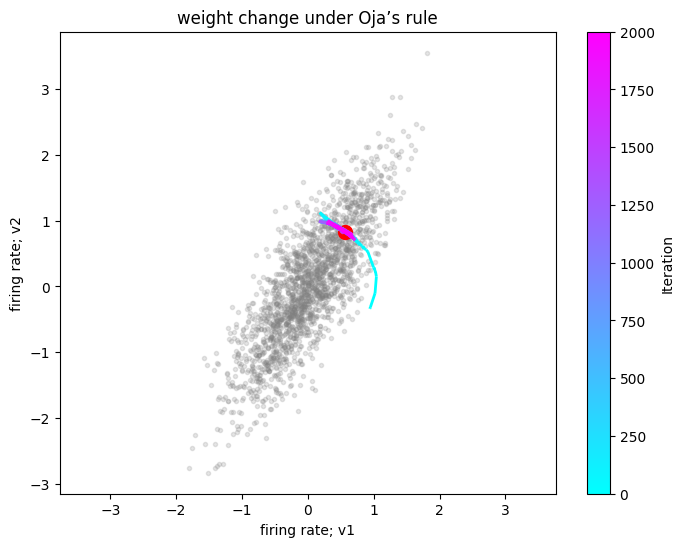

The final weight vector w is: (0.5684945647973649,0.8243055309339563)


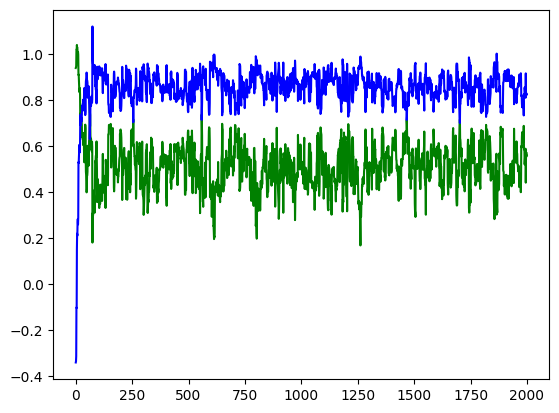

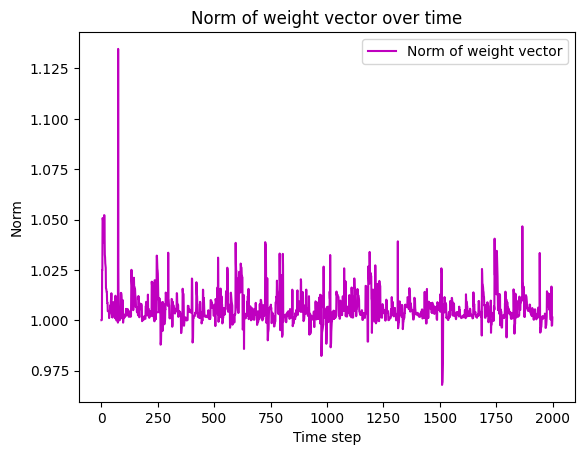

In [8]:
# eta 0.2


import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.collections as mcoll
import neurodynex3.ojas_rule.oja as oja

cloud = oja.make_cloud(n=2000, ratio=.3, angle=60)
wcourse = oja.learn(cloud, initial_angle=-20, eta=0.2)

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(cloud[:, 0], cloud[:, 1], marker=".", alpha=0.2, color="gray")
plt.plot(wcourse[-1, 0], wcourse[-1, 1], "or", markersize=10) # mark final weight vector

# color mapping
iterations = np.arange(len(wcourse))
norm = colors.Normalize(vmin=0, vmax=len(wcourse))
cmap = cm.cool

# line segments
points = np.array([wcourse[:, 0], wcourse[:, 1]]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# linecollection
lc = mcoll.LineCollection(segments, cmap=cmap, norm=norm, linewidth=2)
lc.set_array(iterations)  
ax.add_collection(lc)

cbar = plt.colorbar(lc, ax=ax)
cbar.set_label("Iteration")

ax.set_xlabel("firing rate; v1")
ax.set_ylabel("firing rate; v2")
ax.axis("equal")
plt.title("weight change under Oja’s rule")	
#plt.suptitle("Grey points: Datapoints (two presynaptic firing rates, presented sequentially in random order). Colored points: weight change under Oja’s rule.")
plt.show()

plt.figure()
plt.plot(wcourse[:, 0], "g")
plt.plot(wcourse[:, 1], "b")

print("The final weight vector w is: ({},{})".format(wcourse[-1,0],wcourse[-1,1]))

weight_norm = np.linalg.norm(wcourse, axis=1)
#The weight norm represents the magnitude of the weight vector over time. The weight norm represents the magnitude of the weight vector over time. 

plt.figure()
plt.plot(weight_norm, "m", label="Norm of weight vector")
plt.xlabel("Time step")
plt.ylabel("Norm")
plt.title("Norm of weight vector over time")
plt.legend()


Small learning rate

The weight vector evolves more smoothly, with smaller step sizes.
It follows a gradual curved trajectory, adapting more cautiously.
There are fewer oscillations, meaning more stable updates.
Convergence takes longer, but the final weight vector is more precise.

Large learning rate

The weight vector changes rapidly in the beginning.
It moves in larger steps, covering more distance per update.
The trajectory shows larger oscillations before stabilizing.
The final weight converges faster but may overshoot before settling.

The crossing of the two components of the weight vector in the graph occurs due to competition during the learning process, which is inherent in Oja’s rule and principal component analysis (PCA)-based learning.

If the learning rate is too high, it might not converge properly, leading to fluctuations around the principal component instead of perfect alignment (see below).

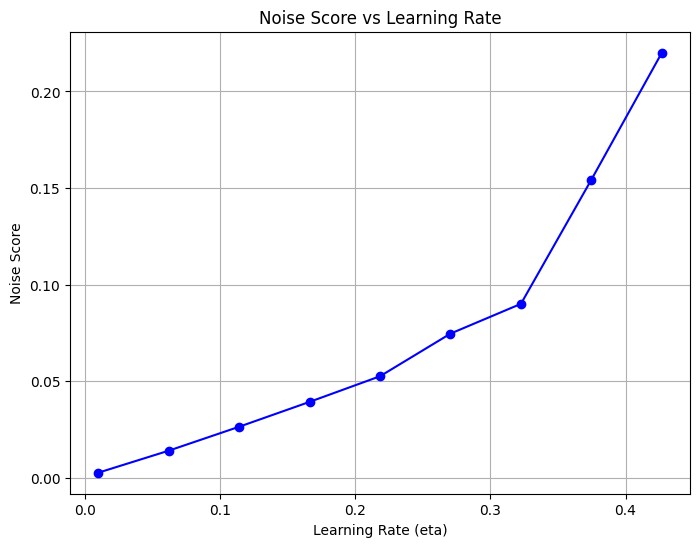

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.collections as mcoll
import neurodynex3.ojas_rule.oja as oja

def compute_noise_score(eta):
    cloud = oja.make_cloud(n=2000, ratio=.3, angle=60)
    wcourse = oja.learn(cloud, initial_angle=-20, eta=eta)
    
    #compute weight differences (fluctuations)
    dw_x = np.diff(wcourse[:, 0])  #changes in x1 direction
    dw_y = np.diff(wcourse[:, 1])  #changes in x2 direction
    
    noise_x = np.std(dw_x)
    noise_y = np.std(dw_y)
    
    #compute single noise score (average of standard deviations)
    noise_score = (noise_x + noise_y) / 2
    
    return noise_score

eta_values = np.linspace(0.01, 1.0, 20)
noise_scores = [compute_noise_score(eta) for eta in eta_values]

plt.figure(figsize=(8, 6))
plt.plot(eta_values, noise_scores, marker='o', linestyle='-', color='b')
plt.xlabel("Learning Rate (eta)")
plt.ylabel("Noise Score")
plt.title("Noise Score vs Learning Rate")
plt.grid()
plt.show()


# Exercise: 9.2 circular data & 9.3 What is the neuron learning?

Now we study Oja’s rule on a data set which has no correlations.

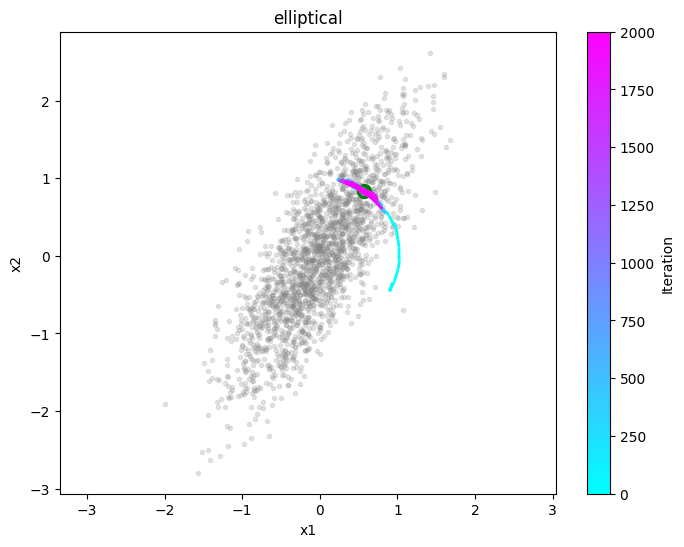

Text(0, 0.5, 'Weight')

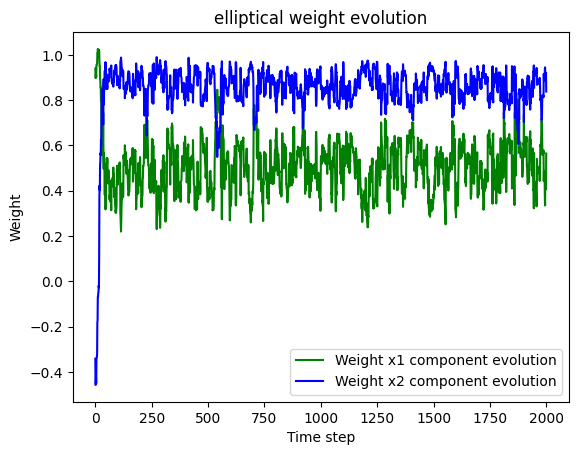

In [10]:
# elliptical


import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.collections as mcoll
import neurodynex3.ojas_rule.oja as oja

cloud = oja.make_cloud(n=2000, ratio=.3, angle=60)
wcourse = oja.learn(cloud, initial_angle=-20, eta=0.2)

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(cloud[:, 0], cloud[:, 1], marker=".", alpha=0.2, color="gray")
plt.plot(wcourse[-1, 0], wcourse[-1, 1], "og", markersize=10) # mark final weight vector

# color mapping
iterations = np.arange(len(wcourse))
norm = colors.Normalize(vmin=0, vmax=len(wcourse))
cmap = cm.cool

# line segments
points = np.array([wcourse[:, 0], wcourse[:, 1]]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# linecollection
lc = mcoll.LineCollection(segments, cmap=cmap, norm=norm, linewidth=2)
lc.set_array(iterations)  
ax.add_collection(lc)

cbar = plt.colorbar(lc, ax=ax)
cbar.set_label("Iteration")

ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.axis("equal")
plt.title("elliptical")
#plt.suptitle("Grey points: Datapoints (two presynaptic firing rates, presented sequentially in random order). Colored points: weight change under Oja’s rule.")
plt.show()

plt.figure()
plt.plot(wcourse[:, 0], "g", label="Weight x1 component evolution")
plt.plot(wcourse[:, 1], "b", label="Weight x2 component evolution")
plt.legend()
plt.title("elliptical weight evolution")
plt.xlabel("Time step")
plt.ylabel("Weight")



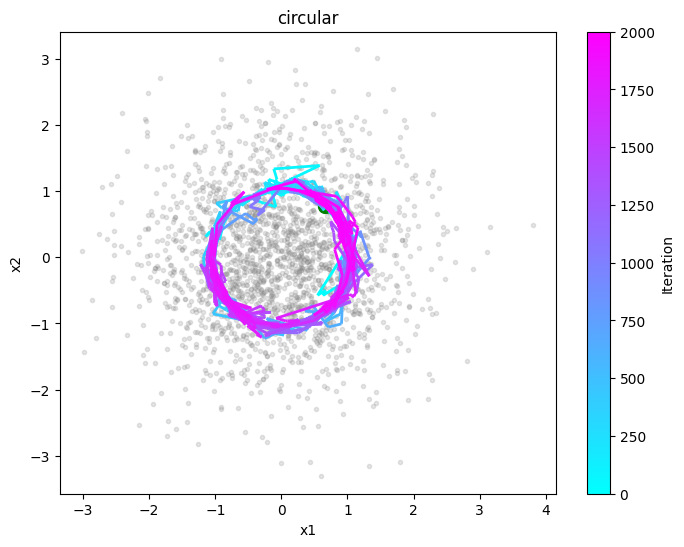

Text(0, 0.5, 'Weight')

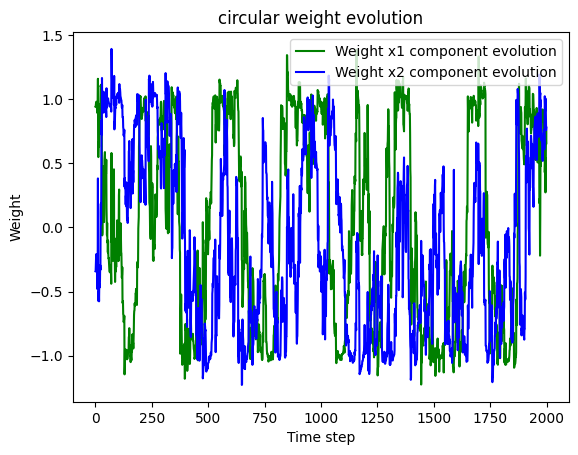

In [11]:
# circular


import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.collections as mcoll
import neurodynex3.ojas_rule.oja as oja

cloud = oja.make_cloud(n=2000, ratio=1, angle=60)
wcourse = oja.learn(cloud, initial_angle=-20, eta=0.2)

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(cloud[:, 0], cloud[:, 1], marker=".", alpha=0.2, color="gray")
plt.plot(wcourse[-1, 0], wcourse[-1, 1], "og", markersize=10) # mark final weight vector

# color mapping
iterations = np.arange(len(wcourse))
norm = colors.Normalize(vmin=0, vmax=len(wcourse))
cmap = cm.cool

# line segments
points = np.array([wcourse[:, 0], wcourse[:, 1]]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# linecollection
lc = mcoll.LineCollection(segments, cmap=cmap, norm=norm, linewidth=2)
lc.set_array(iterations)  
ax.add_collection(lc)

cbar = plt.colorbar(lc, ax=ax)
cbar.set_label("Iteration")

ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.axis("equal")
plt.title("circular")
#plt.suptitle("Grey points: Datapoints (two presynaptic firing rates, presented sequentially in random order). Colored points: weight change under Oja’s rule.")
plt.show()

plt.figure()
plt.plot(wcourse[:, 0], "g", label="Weight x1 component evolution")
plt.plot(wcourse[:, 1], "b", label="Weight x2 component evolution")
plt.legend()
plt.title("circular weight evolution")
plt.xlabel("Time step")
plt.ylabel("Weight")



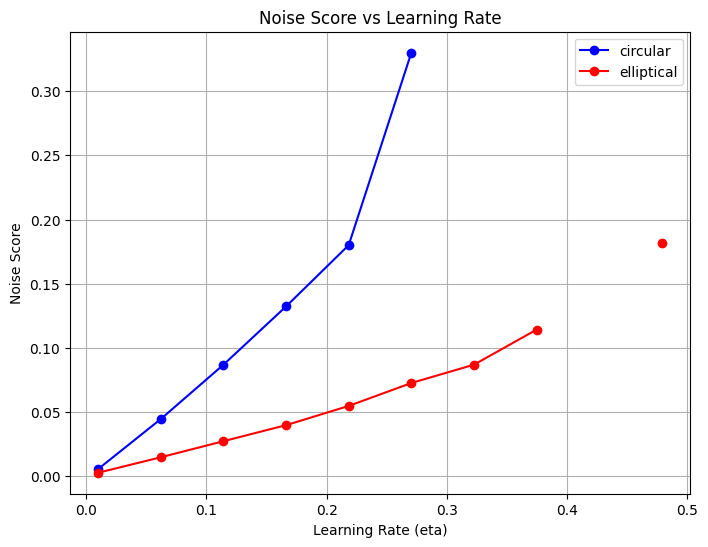

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.collections as mcoll
import neurodynex3.ojas_rule.oja as oja

def compute_noise_score_circular(eta):
    cloud = oja.make_cloud(n=2000, ratio=1, angle=60)
    wcourse = oja.learn(cloud, initial_angle=-20, eta=eta)
    
    #compute weight differences (fluctuations)
    dw_x = np.diff(wcourse[:, 0])  #changes in x1 direction
    dw_y = np.diff(wcourse[:, 1])  #changes in x2 direction
    
    noise_x = np.std(dw_x)
    noise_y = np.std(dw_y)
    
    #compute single noise score (average of standard deviations)
    noise_score = (noise_x + noise_y) / 2
    
    return noise_score

def compute_noise_score_elliptical(eta):
    cloud = oja.make_cloud(n=2000, ratio=0.3, angle=60)
    wcourse = oja.learn(cloud, initial_angle=-20, eta=eta)
    
    #compute weight differences (fluctuations)
    dw_x = np.diff(wcourse[:, 0])  #changes in x1 direction
    dw_y = np.diff(wcourse[:, 1])  #changes in x2 direction
    
    noise_x = np.std(dw_x)
    noise_y = np.std(dw_y)
    
    #compute single noise score (average of standard deviations)
    noise_score = (noise_x + noise_y) / 2
    
    return noise_score

eta_values = np.linspace(0.01, 1.0, 20)
noise_scores_circular = [compute_noise_score_circular(eta) for eta in eta_values]
noise_scores_elliptical = [compute_noise_score_elliptical(eta) for eta in eta_values]

plt.figure(figsize=(8, 6))
plt.plot(eta_values, noise_scores_circular, marker='o', linestyle='-', color='b', label="circular")
plt.plot(eta_values, noise_scores_elliptical, marker='o', linestyle='-', color='r', label="elliptical")
plt.xlabel("Learning Rate (eta)")
plt.ylabel("Noise Score")
plt.title("Noise Score vs Learning Rate")
plt.legend()
plt.grid()
plt.show()


A circular data cloud has no preferred direction. This causes the neuron to circulate around the data cloud and to have slower convergence, creating much more noise. 
A smaller eta would slow learning, potentially making the outcome more stable but slower to converge. Learning rate affects how much each data point influences the weights. 

In [13]:
'''

--> old code, ignore but keep in case needed

# %matplotlib inline
import neurodynex3.ojas_rule.oja as oja
import matplotlib.pyplot as plt
import numpy as np

cloud = oja.make_cloud(n=200, ratio=0.3, angle=60)

wcourse = oja.learn(cloud, initial_angle=-20, eta=0.2)

plt.scatter(cloud[:, 0], cloud[:, 1], marker=".", alpha=.2)
plt.plot(wcourse[-1, 0], wcourse[-1, 1], "or", markersize=10)
plt.axis('equal')

plt.figure()
plt.plot(wcourse[:, 0], "g", label="Weight component w0")
plt.plot(wcourse[:, 1], "b", label="Weight component w1")
plt.legend()
plt.xlabel("Time step")
plt.ylabel("Weight value")
plt.title("Weight components over time")

weight_norm = np.linalg.norm(wcourse, axis=1)

plt.figure()
plt.plot(weight_norm, "m", label="Norm of weight vector")
plt.xlabel("Time step")
plt.ylabel("Norm")
plt.title("Norm of weight vector over time")
plt.legend()

print("The final weight vector w is: ({:.2f}, {:.2f})".format(wcourse[-1, 0], wcourse[-1, 1]))


# Extract final weights
final_w = (wcourse[-1, 0], wcourse[-1, 1])
norm_w = np.linalg.norm(final_w)

# Calculate the input vector that maximizes firing
max_firing_input = final_w / norm_w

# Print results
print(f"The final weight vector is: {final_w}")
print(f"The input vector that maximizes firing (normalized): {max_firing_input}")

'''


'\n\n--> old code, ignore but keep in case needed\n\n# %matplotlib inline\nimport neurodynex3.ojas_rule.oja as oja\nimport matplotlib.pyplot as plt\nimport numpy as np\n\ncloud = oja.make_cloud(n=200, ratio=0.3, angle=60)\n\nwcourse = oja.learn(cloud, initial_angle=-20, eta=0.2)\n\nplt.scatter(cloud[:, 0], cloud[:, 1], marker=".", alpha=.2)\nplt.plot(wcourse[-1, 0], wcourse[-1, 1], "or", markersize=10)\nplt.axis(\'equal\')\n\nplt.figure()\nplt.plot(wcourse[:, 0], "g", label="Weight component w0")\nplt.plot(wcourse[:, 1], "b", label="Weight component w1")\nplt.legend()\nplt.xlabel("Time step")\nplt.ylabel("Weight value")\nplt.title("Weight components over time")\n\nweight_norm = np.linalg.norm(wcourse, axis=1)\n\nplt.figure()\nplt.plot(weight_norm, "m", label="Norm of weight vector")\nplt.xlabel("Time step")\nplt.ylabel("Norm")\nplt.title("Norm of weight vector over time")\nplt.legend()\n\nprint("The final weight vector w is: ({:.2f}, {:.2f})".format(wcourse[-1, 0], wcourse[-1, 1]))\n\n

After learning with **Oja's Rule**, the output represents the **projection** of the input vector onto the learned weight vector, which aligns with the **principal component** of the input data. This means:

- **Variance Maximization:** The output reflects the input's alignment with the direction of **maximum variance**.  
- **Data Compression:** The neuron extracts the most significant feature of the input, reducing dimensionality.  



Take the final weights [w31, w32], then calculate a single input vector (v1=?, v2=?) that leads to a maximal output firing y. Constrain your input to norm([v1,v2]) =1.
Calculate an input which leads to a minimal output firing y.

Final weight vector: (0.7210, 0.7014)
Optimal input vector (maximal output): (0.7168, 0.6973)
Optimal input vector (minimal output): (-0.7168, -0.6973)
Computed max output input vector: (0.7237, 0.6901)
Computed min output input vector: (-0.7453, -0.6668)


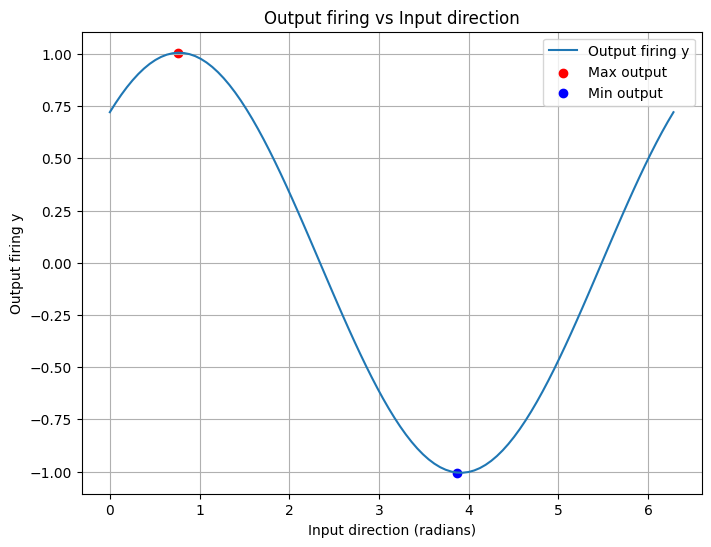

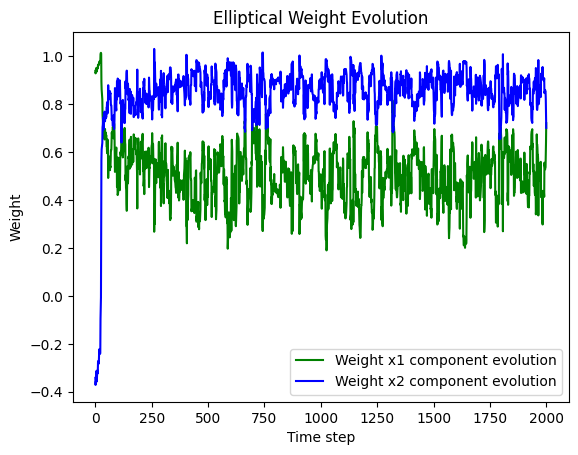

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import neurodynex3.ojas_rule.oja as oja

cloud = oja.make_cloud(n=2000, ratio=.3, angle=60)
wcourse = oja.learn(cloud, initial_angle=-20, eta=0.2)

w31, w32 = wcourse[-1, 0], wcourse[-1, 1]

norm_w = np.linalg.norm([w31, w32])
if norm_w != 0:
    v1, v2 = w31 / norm_w, w32 / norm_w
    v1_min, v2_min = -v1, -v2  # Opposite direction minimizes y
else:
    v1, v2, v1_min, v2_min = 0, 0, 0, 0

print(f"Final weight vector: ({w31:.4f}, {w32:.4f})")
print(f"Optimal input vector (maximal output): ({v1:.4f}, {v2:.4f})")
print(f"Optimal input vector (minimal output): ({v1_min:.4f}, {v2_min:.4f})")

# compute output function
theta = np.linspace(0, 2 * np.pi, 100)
vectors = np.array([np.cos(theta), np.sin(theta)]) 
outputs = w31 * vectors[0] + w32 * vectors[1] 

# compute derivative and find zero crossings
deriv_outputs = np.gradient(outputs, theta) 
zero_crossings = np.where(np.diff(np.sign(deriv_outputs)))[0]

# identify max and min points
max_index = zero_crossings[np.argmax(outputs[zero_crossings])]
min_index = zero_crossings[np.argmin(outputs[zero_crossings])]

# compute vectors for max and min angles
theta_max = theta[max_index]
theta_min = theta[min_index]

v_max = np.array([np.cos(theta_max), np.sin(theta_max)])
v_min = np.array([np.cos(theta_min), np.sin(theta_min)])

print(f"Computed max output input vector: ({v_max[0]:.4f}, {v_max[1]:.4f})")
print(f"Computed min output input vector: ({v_min[0]:.4f}, {v_min[1]:.4f})")

plt.figure(figsize=(8, 6))
plt.plot(theta, outputs, label="Output firing y")
plt.scatter(theta_max, outputs[max_index], color='red', label="Max output")
plt.scatter(theta_min, outputs[min_index], color='blue', label="Min output")
plt.xlabel("Input direction (radians)")
plt.ylabel("Output firing y")
plt.title("Output firing vs Input direction")
plt.legend()
plt.grid()
plt.show()

plt.figure()
plt.plot(wcourse[:, 0], "g", label="Weight x1 component evolution")
plt.plot(wcourse[:, 1], "b", label="Weight x2 component evolution")
plt.legend()
plt.title("Elliptical Weight Evolution")
plt.xlabel("Time step")
plt.ylabel("Weight")
plt.show()


In [16]:
'''Extra --> 3D plot

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import Axes3D
import neurodynex3.ojas_rule.oja as oja

def plot_oja_trace_3d(data_cloud, weights_course):
    """
    Plots the datapoints and the time series of the weights in a 3D interactive scatter plot.
    
    Args:
        data_cloud (numpy.ndarray): n by 3 data
        weights_course (numpy.ndarray): n by 3 weights
    """
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    # Enable interactive rotation
    ax.view_init(elev=20, azim=30)

    # Scatter plot for the data points
    ax.scatter(
        data_cloud[:, 0], data_cloud[:, 1], data_cloud[:, 2],
        marker=".", alpha=0.2, color="gray"
    )

    # Color mapping
    iterations = np.arange(len(weights_course))
    norm = colors.Normalize(vmin=0, vmax=len(weights_course))
    cmap = cm.cool

    # Scatter plot for weight course with color gradient
    colors_map = cmap(iterations / float(len(iterations)))
    ax.scatter(
        weights_course[:, 0], weights_course[:, 1], weights_course[:, 2],
        color=colors_map, s=15
    )

    # Colorbar
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array(iterations)
    cbar = plt.colorbar(sm, ax=ax)
    cbar.set_label("Iteration")

    # Labels
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    ax.set_zlabel("x3")
    plt.title("3D Scatter Plot: Oja's Rule Weight Change")

    plt.show()

# Generate data and weights using Oja's rule
cloud = oja.make_cloud(n=2000, ratio=.3, angle=60)
wcourse = oja.learn(cloud, initial_angle=-20, eta=0.04)

# Modify the cloud to be 3D by adding a third independent variable
cloud_3d = np.hstack((cloud, np.random.randn(cloud.shape[0], 1) * 0.1))
wcourse_3d = np.hstack((wcourse, np.random.randn(wcourse.shape[0], 1) * 0.1))

# Plot the 3D scatter
plot_oja_trace_3d(cloud_3d, wcourse_3d)

'''

'Extra --> 3D plot\n\nimport numpy as np\nimport matplotlib.pyplot as plt\nimport matplotlib.cm as cm\nimport matplotlib.colors as colors\nfrom mpl_toolkits.mplot3d import Axes3D\nimport neurodynex3.ojas_rule.oja as oja\n\ndef plot_oja_trace_3d(data_cloud, weights_course):\n    """\n    Plots the datapoints and the time series of the weights in a 3D interactive scatter plot.\n    \n    Args:\n        data_cloud (numpy.ndarray): n by 3 data\n        weights_course (numpy.ndarray): n by 3 weights\n    """\n    fig = plt.figure(figsize=(10, 7))\n    ax = fig.add_subplot(111, projection=\'3d\')\n\n    # Enable interactive rotation\n    ax.view_init(elev=20, azim=30)\n\n    # Scatter plot for the data points\n    ax.scatter(\n        data_cloud[:, 0], data_cloud[:, 1], data_cloud[:, 2],\n        marker=".", alpha=0.2, color="gray"\n    )\n\n    # Color mapping\n    iterations = np.arange(len(weights_course))\n    norm = colors.Normalize(vmin=0, vmax=len(weights_course))\n    cmap = cm.cool\